In [1]:
import glob,os
import numpy as np
import pandas as pd
import multiprocessing
from sklearn import decomposition
from schictools import loading,scatter,matrix_operation,plot_gallery,plot_altitude


In [2]:
NMuMGlist= glob.glob(os.path.join("/store/zlwang/Workspace/data/Lee2019/NMuMG","*txt.gz"))
mESClist = glob.glob(os.path.join("/store/zlwang/Workspace/data/Lee2019/mESC","*txt.gz"))
def plan3(filepath):
    data_type1 = loading.Contact_type1(filepath)
    data_type1.preprocess()
    raw_mat = data_type1.contact_matrix()
    return(raw_mat)



In [3]:
data_type1 = loading.Contact_type1(mESClist[1])
data_type1.preprocess()
data_type1.contact
raw_mat = data_type1.contact_matrix() 
## Smoothing use the matrix_operation

OE_mat = matrix_operation(raw_mat,["logarithm","OE_norm"])


Type1 data preprocess finished
This singlecell hic file has 134711 reads 
calculate the matrix use 17.00 seconds (pid 24962 finished)


Type1 data preprocess finished
Type1 data preprocess finished
Type1 data preprocess finished
Type1 data preprocess finished
Type1 data preprocess finished
Type1 data preprocess finished
Type1 data preprocess finished
Type1 data preprocess finished
Type1 data preprocess finished
Type1 data preprocess finished
Type1 data preprocess finished
Type1 data preprocess finished
Type1 data preprocess finished
Type1 data preprocess finished
Type1 data preprocess finished
Type1 data preprocess finished
Type1 data preprocess finished
Type1 data preprocess finished
Type1 data preprocess finished
Type1 data preprocess finished
This singlecell hic file has 55384 reads 
calculate the matrix use 12.88 seconds (pid 26492 finished)
This singlecell hic file has 82846 reads 
calculate the matrix use 18.58 seconds (pid 26482 finished)
This singlecell hic file has 89666 reads 
calculate the matrix use 20.20 seconds (pid 26484 finished)
This singlecell hic file has 129600 reads 
calculate the matrix use 28.78 

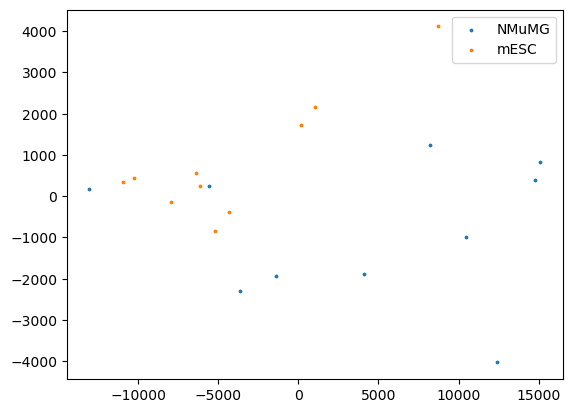

In [4]:
mESClist = mESClist[:10]
NMuMGlist = NMuMGlist[:10]
NMuMG = []
mESC = []
pool = multiprocessing.Pool(20)
pool1 = pool.map_async(plan3,mESClist,callback=mESC.extend)
pool2 = pool.map_async(plan3,NMuMGlist,callback=NMuMG.extend)
pool.close()
pool.join()
matrix = mESC + NMuMG
label = ["mESC" for m in mESC]+["NMuMG" for n in NMuMG]
## Wait untill the multiprocessing finish 

x = np.array(matrix)
y = label
print(x.shape)
# You can smoothing use the matrix_operation, but time consuming
# OE = matrix_operation(matrix[1],["logarithm","OE_norm"])
## Decomposition use different methods

pca = decomposition.PCA(n_components=2)
# egi_ravel = [mat.ravel() for mat in matrix]
# egi_pc2 = [pca.fit_transform(mat)[:,1] for mat in matrix]

egi_sum = [mat.sum(axis = 0) for mat in matrix]
## Plot the 2D figure

pc = pca.fit_transform(egi_sum)
scatter(pc,label=label)


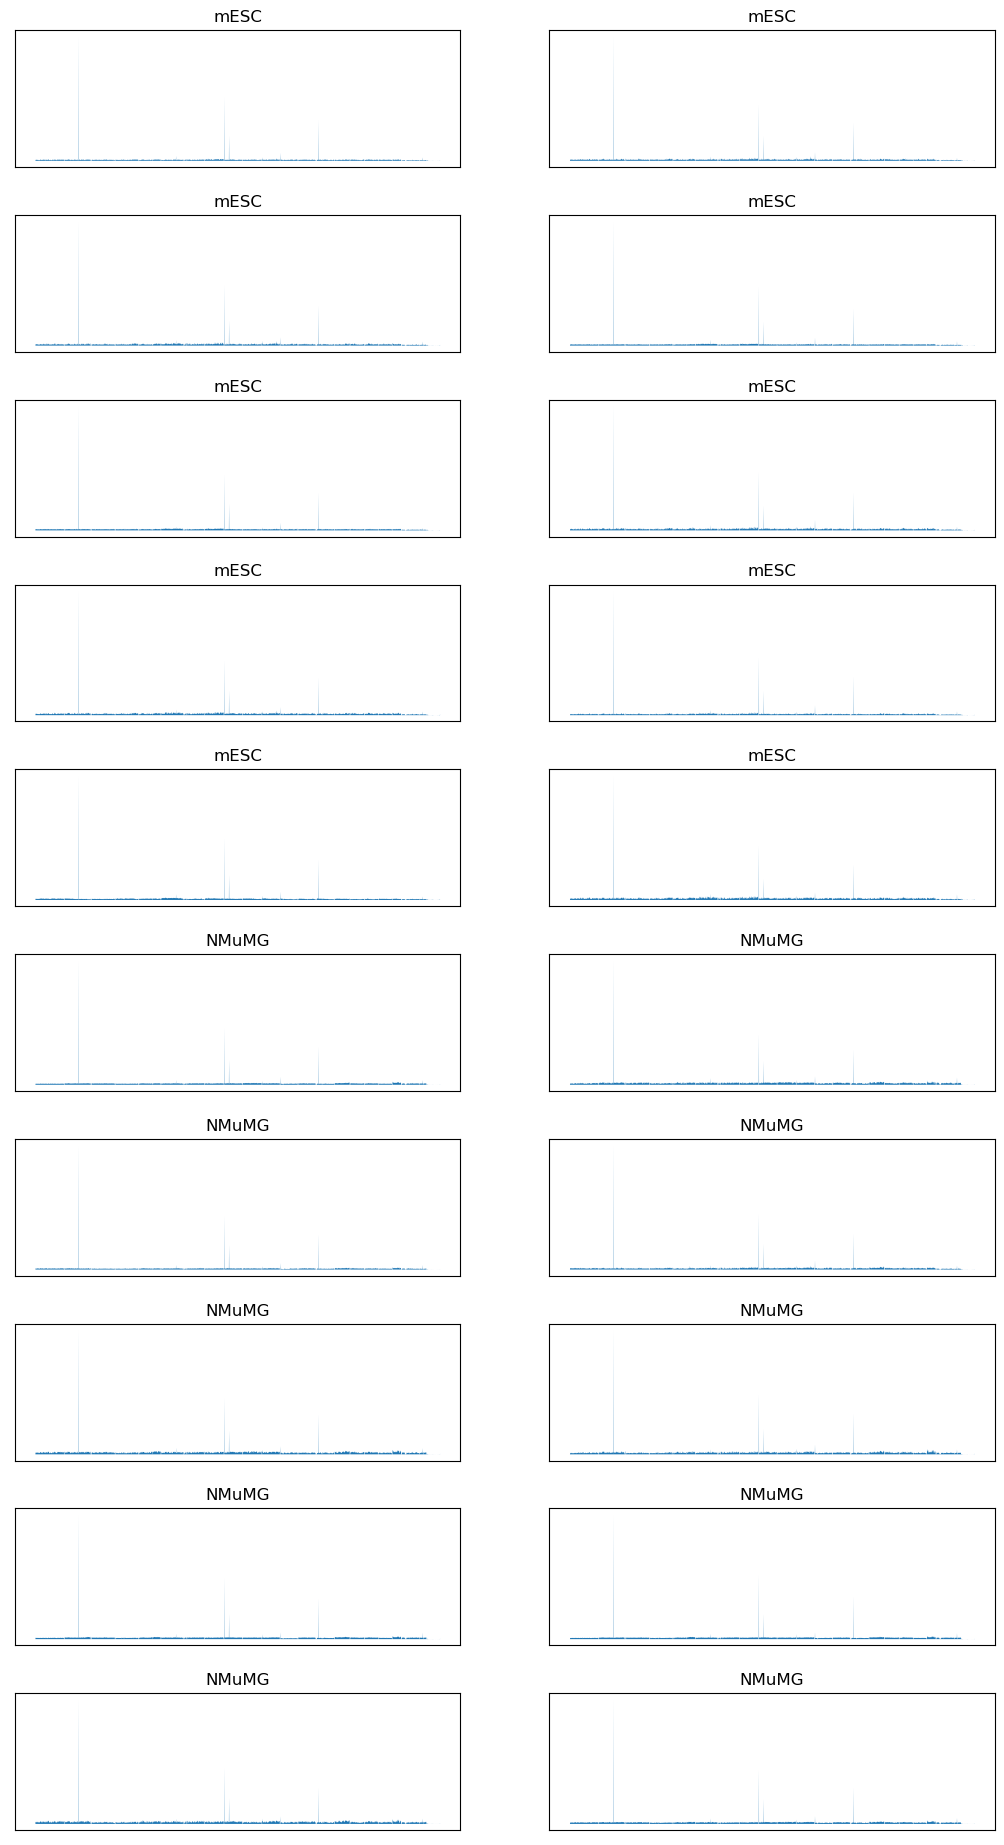

In [7]:
plot_altitude(egi_sum,label)


Type3 data preprocess finished


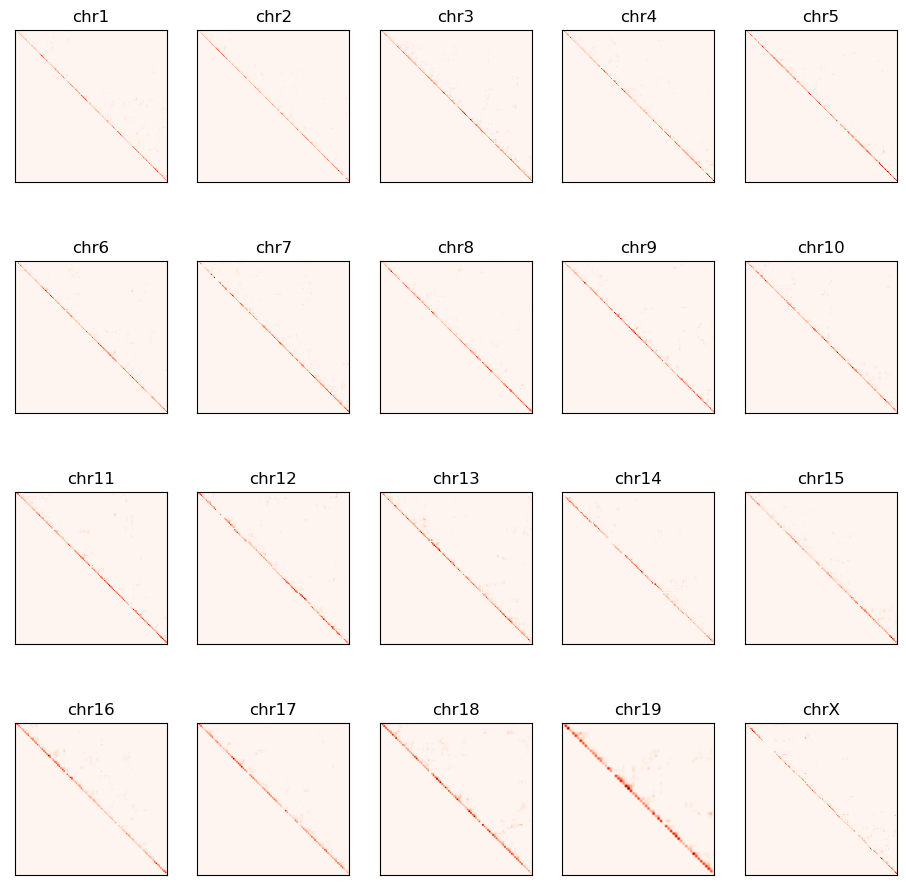

In [8]:
data_type3 = loading.Contact_type3('/store/zlwang/Workspace/data/Tan2019/oflctory/GSM3446102_cell_001.contacts.con.txt.gz')
data_type3.preprocess()
chroms = data_type3.plot_matrix()
plot_gallery(list(chroms.values()),list(chroms.keys()),cmap = "Reds")
